<a href="https://colab.research.google.com/github/AnIsAsPe/Recomendaci-n-de-libros-usando-LDA/blob/main/Recomendaci%C3%B3n_de_libros_usando_LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bibliotecas y funciones

In [1]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning) 

In [2]:
# Procesamiento y Visualizacion de Datos
import pandas as pd
import numpy as np
from collections import Counter # para contar frecuencias
import matplotlib.pyplot as plt 
import seaborn as sns 

# Preprocesar texto
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
nltk.download('stopwords')
from wordcloud import WordCloud

# Modelado de tópicos
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pyLDAvis


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\conte\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
c:\Users\conte\AppData\Local\Programs\Python\Python310\lib\site-packages\past\builtins\misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  from imp import reload


In [3]:
stopwords_nltk = stopwords.words('spanish')
print(stopwords_nltk, len(stopwords_nltk))

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estás', 'está', 'estamos', 'estáis', 'están', 'e

In [4]:
stopwords = pd.read_csv('https://gist.githubusercontent.com/cr0wg4n/78554c5d0afa9944d2fa3a4435d83a57/raw/df59fb916108f2a58bf1a3d8c62818b44231586d/spanish-stop-words.txt', header=None)
stopwords_list = stopwords[0].tolist()
print(stopwords_list, len(stopwords_list))

['a', 'actualmente', 'adelante', 'además', 'afirmó', 'agregó', 'ahora', 'ahí', 'al', 'algo', 'alguna', 'algunas', 'alguno', 'algunos', 'algún', 'alrededor', 'ambos', 'ampleamos', 'ante', 'anterior', 'antes', 'apenas', 'aproximadamente', 'aquel', 'aquellas', 'aquellos', 'aqui', 'aquí', 'arriba', 'aseguró', 'así', 'atras', 'aunque', 'ayer', 'añadió', 'aún', 'bajo', 'bastante', 'bien', 'buen', 'buena', 'buenas', 'bueno', 'buenos', 'cada', 'casi', 'cerca', 'cierta', 'ciertas', 'cierto', 'ciertos', 'cinco', 'comentó', 'como', 'con', 'conocer', 'conseguimos', 'conseguir', 'considera', 'consideró', 'consigo', 'consigue', 'consiguen', 'consigues', 'contra', 'cosas', 'creo', 'cual', 'cuales', 'cualquier', 'cuando', 'cuanto', 'cuatro', 'cuenta', 'cómo', 'da', 'dado', 'dan', 'dar', 'de', 'debe', 'deben', 'debido', 'decir', 'dejó', 'del', 'demás', 'dentro', 'desde', 'después', 'dice', 'dicen', 'dicho', 'dieron', 'diferente', 'diferentes', 'dijeron', 'dijo', 'dio', 'donde', 'dos', 'durante', 'e', '

<h2>  Funciones

In [5]:
def nube_palabras(sec_textos):
    # Crear la cadena con la que haremos la nube de palabras
    text= " ".join(review for review in sec_textos)
    
    # Crear la nube de palabras
    wordcloud = WordCloud(max_font_size=50, 
                          max_words=100, 
                          background_color="white", 
                          normalize_plurals=False, 
                          collocations=False).generate(text)
    

    # Desplegar la imagen generada
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

In [6]:
def preprocesar(texto):
  #convierte a minúsculas
  texto = (texto).lower()

  #elimina stopwords
  stop = re.compile(r'\b(' + r'|'.join(stopwords_list) + r')\b\s*') #stopwords.words('spanish')
  texto = stop.sub('', texto) 

  #Quitar puntuación y números
  texto = re.sub('[^ña-záéíóúü]+', ' ', texto)

  #lematizar y quedarnos con palabras que tengan más de tres caracteres
  # st = PorterStemmer()
  lemma = WordNetLemmatizer()
  texto = texto.split()
  texto = ' '.join([lemma.lemmatize(i) for i in texto if len(i)>2])
  
  return(texto)

# Lectura y exploración de datos

In [7]:
import glob

speech_list = glob.glob('C:\\Users\\conte\\OneDrive\\Escritorio\\Discursos\\AF\\*.txt')

df_af = pd.DataFrame(columns=['speech','date','speech_length'], index=[i for i in range(len(speech_list))])

for key, speech in enumerate(speech_list):
    with open(speech, 'r', encoding='utf-8') as file:
        df_af['speech'][key] = file.read()
    df_af['date'][key] = speech[51:53] + '/' + speech[54:56] + '/' + speech[57:61]
    df_af['speech'][key] = df_af['speech'][key].replace('(APLAUSOS)','')
    df_af['speech'][key] = df_af['speech'][key].replace('(APLAUSO)','')
    df_af['speech'][key] = df_af['speech'][key].replace('PRESIDENTE FERNANDEZ.-','')
    df_af['speech'][key] = df_af['speech'][key].replace('FERNANDEZ.-','')
    df_af['speech'][key] = df_af['speech'][key].replace('PRESIDENTE.-','')
    df_af['speech'][key] = df_af['speech'][key].replace('PERIODISTA.-','')
    df_af['speech_length'][key] = len(df_af['speech'][key].split())

In [8]:
# Dtypes assignment
df_af['speech'] = df_af['speech'].astype(str)
df_af['date'] = df_af['date'].astype('M')
df_af['speech_length'] = df_af['speech_length'].astype(int)

#Sorting by date
df_af = df_af.sort_values('date')

df_af

,speech,date,speech_length
429,Señora Vicepresidente; Diputadas; Diputados; S...,2019-12-10,7411
434,"Buenas noches, Argentina. Qué linda es esta no...",2019-12-11,1174
445,"Bueno, buenos días, buenas tardes, buen mediod...",2019-12-18,2223
447,"Parece que hay otro protocolo, pero voy a romp...",2019-12-20,1696
459,Muchas gracias a todos y a todas. Voy a empeza...,2019-12-30,1233
...,...,...,...
334,Muchas gracias a todos y a todas. Gracias quer...,2022-09-19,1242
336,"Buenas noches a todos y a todas, gracias por e...",2022-09-20,1035
337,Muchas gracias a todos y todas por estar aquí....,2022-09-20,4397
338,"Señor Presidente: muchas veces en la historia,...",2022-09-20,2217


In [9]:
speechs = ' '.join(df_af['speech'][i]for i in range(len(df_af)))

print(f'Total words in speech: {len(speechs.split())}')
words_speechs = Counter(speechs.split())
words_speechs.most_common(10)

Total words in speech: 769826


[('que', 43521),
 ('de', 35509),
 ('la', 26203),
 ('y', 23567),
 ('a', 20006),
 ('en', 18259),
 ('el', 17509),
 ('los', 11597),
 ('es', 9923),
 ('un', 9451)]

c:\Users\conte\AppData\Local\Programs\Python\Python310\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
c:\Users\conte\AppData\Local\Programs\Python\Python310\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
c:\Users\conte\AppData\Local\Programs\Python\Python310\lib\site-packages\wordcloud\wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
c:\Users\conte\AppData\Local\Programs\Python\Python310\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2

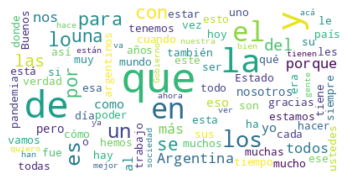

In [10]:
nube_palabras(df_af['speech'])

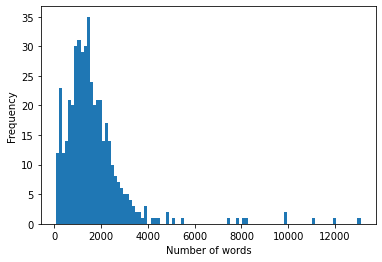

In [11]:
df_af['speech_length'].plot.hist(bins=100)
plt.xlabel('Number of words')
plt.show()

In [12]:
df_af['speech_length'].describe()

count      460.000000
mean      1673.534783
std       1470.667836
min         73.000000
25%        896.250000
50%       1411.000000
75%       2035.000000
max      13100.000000
Name: speech_length, dtype: float64

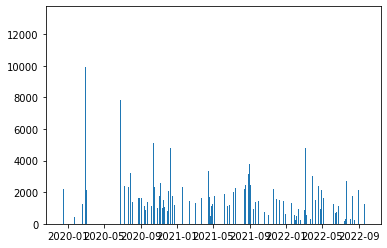

In [13]:
plt.bar(df_af['date'], df_af['speech_length'])
plt.show()

# Obtener los tópicos principales

## Vectorización de textos

In [14]:
df_af['summary'] = df_af['speech'].apply(preprocesar)

df_af['summary_length'] = df_af['summary'].str.split().str.len()

df_af.head()

,speech,date,speech_length,summary,summary_length
429,Señora Vicepresidente; Diputadas; Diputados; S...,2019-12-10,7411,señora vicepresidente diputadas diputados sena...,3135
434,"Buenas noches, Argentina. Qué linda es esta no...",2019-12-11,1174,noches argentina linda noche ustedes cuánto qu...,373
445,"Bueno, buenos días, buenas tardes, buen mediod...",2019-12-18,2223,días tardes mediodía gracias invitación oportu...,756
447,"Parece que hay otro protocolo, pero voy a romp...",2019-12-20,1696,protocolo romperlo diputados dejaron dormir no...,541
459,Muchas gracias a todos y a todas. Voy a empeza...,2019-12-30,1233,gracias empezar pedirle disculpas tardé argent...,456


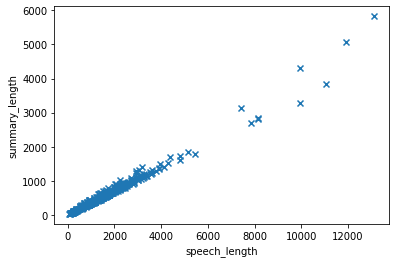

In [15]:
plt.scatter(df_af['speech_length'], df_af['summary_length'], marker='x')
plt.xlabel('speech_length')
plt.ylabel('summary_length')
plt.show()

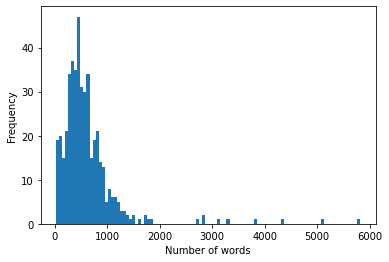

In [16]:
df_af['summary_length'].plot.hist(bins=100)
plt.xlabel('Number of words')
plt.show()

In [17]:
df_af['summary_length'].describe()

count     460.000000
mean      606.673913
std       568.921843
min        24.000000
25%       326.500000
50%       489.000000
75%       736.500000
max      5824.000000
Name: summary_length, dtype: float64

In [18]:
summaries = ' '.join(df_af['summary'][i]for i in range(len(df_af)))

print(f'Total words in speech: {len(summaries.split())}')
words_summaries = Counter(summaries.split())
words_summaries.most_common(10)

Total words in speech: 279070


[('argentina', 4879),
 ('gracias', 2004),
 ('país', 1721),
 ('mundo', 1548),
 ('argentinos', 1509),
 ('día', 1462),
 ('pandemia', 1457),
 ('años', 1329),
 ('ustedes', 1016),
 ('quiero', 971)]

c:\Users\conte\AppData\Local\Programs\Python\Python310\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
c:\Users\conte\AppData\Local\Programs\Python\Python310\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
c:\Users\conte\AppData\Local\Programs\Python\Python310\lib\site-packages\wordcloud\wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
c:\Users\conte\AppData\Local\Programs\Python\Python310\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2

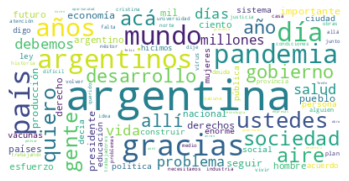

In [19]:
nube_palabras(df_af['summary'])

In [20]:
vectorizer = CountVectorizer(min_df = 10, max_df = 0.15, ngram_range=(1,3))
BOW = vectorizer.fit_transform(df_af['summary'])
BOW.shape

(460, 4129)

In [21]:
vocabulario = vectorizer.get_feature_names_out()
len(vocabulario)

4129

c:\Users\conte\AppData\Local\Programs\Python\Python310\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
c:\Users\conte\AppData\Local\Programs\Python\Python310\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
c:\Users\conte\AppData\Local\Programs\Python\Python310\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
c:\Users\conte\AppData\Local\Programs\Python\Python310\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will b

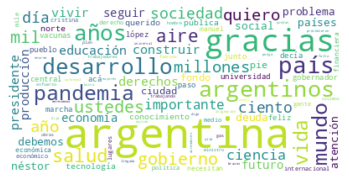

In [22]:
nube_palabras(vocabulario)

## Entrenamiento del modelo

El número óptimo de topicos depende de las caracteristicas del texto a analizar (el largo de los textos, la cantidad de distintas ideas)

No obstante existen algunas metricas que ayudan a determinar k.

In [23]:
k = 5

In [24]:
lda_model = LatentDirichletAllocation(n_components=k, learning_method='online', max_iter=1000, random_state=42) 

In [25]:
%%time
lda_model.fit(BOW) # entrena el modelo y obtienela matriz documento-topico

CPU times: total: 1min 10s
Wall time: 2min 27s


LatentDirichletAllocation(learning_method='online', max_iter=1000,
                          n_components=5, random_state=42)

### Distribución de temas en cada noticia  ($\theta$)

In [26]:
doc_top = pd.DataFrame(lda_model.transform(BOW))
print(doc_top.shape)
doc_top.head()

(460, 5)


,0,1,2,3,4
0,0.062635,0.028488,0.051493,0.000143,0.857240
1,0.257817,0.259878,0.292501,0.161398,0.028406
2,0.000670,0.363635,0.105128,0.323035,0.207532
3,0.097682,0.394090,0.098790,0.408395,0.001042
4,0.358839,0.001268,0.637360,0.001272,0.001262


In [27]:
doc_top.sum(axis=1)

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
455    1.0
456    1.0
457    1.0
458    1.0
459    1.0
Length: 460, dtype: float64

In [28]:
df_lda = pd.merge(df_af, doc_top, left_index=True, right_index=True)
df_lda.head()

,speech,date,speech_length,summary,summary_length,0,1,2,3,4
429,Señora Vicepresidente; Diputadas; Diputados; S...,2019-12-10,7411,señora vicepresidente diputadas diputados sena...,3135,0.017369,0.251337,0.696623,0.017028,0.017643
434,"Buenas noches, Argentina. Qué linda es esta no...",2019-12-11,1174,noches argentina linda noche ustedes cuánto qu...,373,0.000957,0.000955,0.996175,0.000960,0.000954
445,"Bueno, buenos días, buenas tardes, buen mediod...",2019-12-18,2223,días tardes mediodía gracias invitación oportu...,756,0.011189,0.011309,0.011225,0.729630,0.236646
447,"Parece que hay otro protocolo, pero voy a romp...",2019-12-20,1696,protocolo romperlo diputados dejaron dormir no...,541,0.005780,0.976659,0.005961,0.005796,0.005805
459,Muchas gracias a todos y a todas. Voy a empeza...,2019-12-30,1233,gracias empezar pedirle disculpas tardé argent...,456,0.000491,0.000493,0.000494,0.674209,0.324314


### Distribución de palabras en cada tema ($\mu$)

In [29]:
μs = pd.DataFrame(lda_model.exp_dirichlet_component_,
                         columns=vocabulario)
print(μs.shape)
μs

(5, 4129)


,abajo,abandonado,abiertas,abierto,abiertos,abogado,abogados,abordar,abrazamos,abrazar,...,área metropolitana aire,áreas,época,ética,éticamente,ético,éxito,íbamos,órbita,únicos
0,5.235429e-07,5.680700e-07,5.679314e-07,5.093708e-07,6.120140e-07,1.229083e-03,2.408836e-03,5.292433e-07,3.025415e-04,2.595580e-04,...,5.157215e-07,6.650480e-05,6.660491e-07,0.000862,4.227327e-04,5.751711e-07,9.235390e-07,5.058628e-04,5.108433e-07,3.059989e-04
1,4.092883e-04,3.519730e-04,1.072778e-04,1.547347e-04,2.070547e-04,2.276183e-04,3.786229e-05,1.288334e-04,6.128233e-05,3.318254e-04,...,1.604464e-03,1.489934e-07,2.171858e-04,0.000519,1.363487e-07,6.276952e-04,3.175566e-04,1.107994e-03,2.389766e-04,1.769279e-04
2,4.810646e-04,3.739163e-04,1.277027e-04,1.824655e-07,1.768429e-07,2.245994e-04,1.933428e-07,1.791818e-07,3.204666e-04,1.982648e-07,...,1.788951e-07,1.782827e-07,5.593213e-04,0.000612,2.173688e-04,5.194119e-04,1.837077e-07,4.464501e-04,2.265021e-07,2.204881e-07
3,1.414043e-04,2.495976e-07,7.034379e-05,1.145944e-04,1.090980e-04,9.375292e-04,2.539048e-07,2.905469e-07,2.625487e-07,2.700462e-07,...,2.445212e-07,2.438273e-07,8.735319e-05,0.000781,2.274127e-04,7.085061e-04,4.116483e-04,1.450384e-04,3.151988e-07,3.502624e-07
4,2.605009e-07,2.769103e-07,1.914742e-05,6.195662e-04,4.347277e-07,2.411330e-07,2.152986e-07,7.531761e-04,2.099394e-07,3.193272e-05,...,2.343908e-07,4.681882e-04,2.242275e-04,0.000456,2.169803e-07,2.281154e-04,2.962989e-04,2.231622e-07,1.804571e-04,7.654745e-05



Palabras más frecuentes del topico 0
['género', 'delito', 'cultura', 'memoria', 'arte', 'crimen', 'jueces', 'adolfo', 'violencia', 'lucha']


c:\Users\conte\AppData\Local\Programs\Python\Python310\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
c:\Users\conte\AppData\Local\Programs\Python\Python310\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
c:\Users\conte\AppData\Local\Programs\Python\Python310\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
c:\Users\conte\AppData\Local\Programs\Python\Python310\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will b

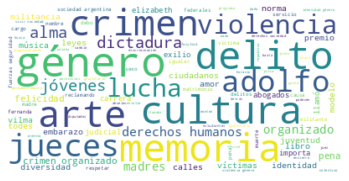

c:\Users\conte\AppData\Local\Programs\Python\Python310\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
c:\Users\conte\AppData\Local\Programs\Python\Python310\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
c:\Users\conte\AppData\Local\Programs\Python\Python310\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
c:\Users\conte\AppData\Local\Programs\Python\Python310\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will b


Palabras más frecuentes del topico 1
['contagios', 'camas', 'cuarentena', 'enfermedad', 'contagio', 'inflación', 'provincia aire', 'medidas', 'jubilados', 'vacunación']


c:\Users\conte\AppData\Local\Programs\Python\Python310\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
c:\Users\conte\AppData\Local\Programs\Python\Python310\lib\site-packages\wordcloud\wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
c:\Users\conte\AppData\Local\Programs\Python\Python310\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
c:\Users\conte\AppData\Local\Programs\Python\Python310\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and wi

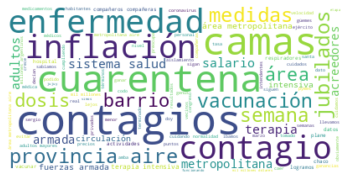

c:\Users\conte\AppData\Local\Programs\Python\Python310\lib\site-packages\wordcloud\wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
c:\Users\conte\AppData\Local\Programs\Python\Python310\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
c:\Users\conte\AppData\Local\Programs\Python\Python310\lib\site-packages\wordcloud\wordcloud.py:520: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  Image.ROTATE_90)
c:\Users\conte\AppData\Local\Programs\Python\Python310\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength


Palabras más frecuentes del topico 2
['universidades', 'viviendas', 'obra pública', 'rioja', 'jorge', 'vivienda', 'ruta', 'educación pública', 'perón', 'santa']


c:\Users\conte\AppData\Local\Programs\Python\Python310\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
c:\Users\conte\AppData\Local\Programs\Python\Python310\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
c:\Users\conte\AppData\Local\Programs\Python\Python310\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
c:\Users\conte\AppData\Local\Programs\Python\Python310\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will b

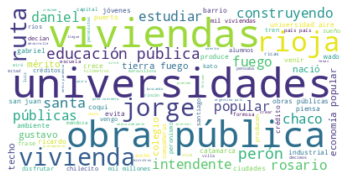


Palabras más frecuentes del topico 3
['gas', 'energía', 'guerra', 'san martín', 'continente', 'ypf', 'capitalismo', 'litio', 'méxico', 'belgrano']


c:\Users\conte\AppData\Local\Programs\Python\Python310\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
c:\Users\conte\AppData\Local\Programs\Python\Python310\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
c:\Users\conte\AppData\Local\Programs\Python\Python310\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
c:\Users\conte\AppData\Local\Programs\Python\Python310\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will b

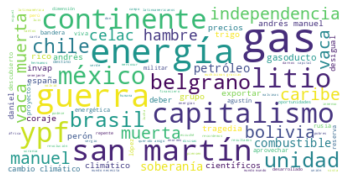

c:\Users\conte\AppData\Local\Programs\Python\Python310\lib\site-packages\wordcloud\wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
c:\Users\conte\AppData\Local\Programs\Python\Python310\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
c:\Users\conte\AppData\Local\Programs\Python\Python310\lib\site-packages\wordcloud\wordcloud.py:520: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  Image.ROTATE_90)
c:\Users\conte\AppData\Local\Programs\Python\Python310\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength


Palabras más frecuentes del topico 4
['mercosur', 'global', 'marco', 'recuperación', 'diálogo', 'medidas', 'sostenible', 'integral', 'programa', 'ambiental']


c:\Users\conte\AppData\Local\Programs\Python\Python310\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
c:\Users\conte\AppData\Local\Programs\Python\Python310\lib\site-packages\wordcloud\wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
c:\Users\conte\AppData\Local\Programs\Python\Python310\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
c:\Users\conte\AppData\Local\Programs\Python\Python310\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2

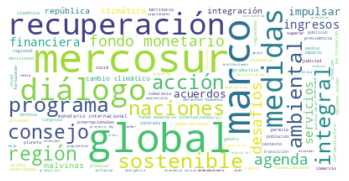

In [30]:
for top in range(k):
  print(f'\nPalabras más frecuentes del topico {top}')
  words = list(μs.T[top].sort_values(ascending=False).head(10).index)
  freq = μs.T[top].sort_values(ascending=False).head(100)
  print(words)
  wordcloud = WordCloud(max_font_size=50, 
                          max_words=100, 
                          background_color="white", 
                          normalize_plurals=False, 
                          collocations=False).generate_from_frequencies(freq)
  plt.imshow(wordcloud, interpolation="bilinear")
  plt.axis('off')
  plt.show()
                          
                      

### Visualización del modelo

In [31]:
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

pyLDAvis.sklearn.prepare(lda_model, BOW, vectorizer)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.017761  0.002394       1        1  37.605725
2     -0.116161 -0.143829       2        1  21.752067
4      0.200540  0.077221       3        1  18.877610
3      0.068882 -0.114736       4        1  13.961433
0     -0.135499  0.178950       5        1   7.803165, topic_info=            Term        Freq       Total Category  logprob  loglift
1778         gas  307.000000  307.000000  Default  30.0000  30.0000
1423     energía  203.000000  203.000000  Default  29.0000  29.0000
1885      género  130.000000  130.000000  Default  28.0000  28.0000
1876      guerra  203.000000  203.000000  Default  27.0000  27.0000
3555  san martín  143.000000  143.000000  Default  26.0000  26.0000
...          ...         ...         ...      ...      ...      ...
2196     jóvenes   45.183302  147.371429   Topic5  -5.4018   1.3684
2238       libro   27.878308   52.093725   Topic5  -5.8847   1.9254
2505      modelo   30.177662   73.422087   Topic5  -5.8054   1.6615
639   ciudadanos   31.077127   90.303851   Topic5  -5.7761   1.4839
169         amor   27.442792   58.741644   Topic5  -5.9004   1.7896

[330 rows x 6 columns], token_table=      Topic      Freq                     Term
term                                          
6         1  0.072649                 abogados
6         5  0.908115                 abogados
28        1  0.190097                   acción
28        2  0.030015                   acción
28        3  0.650332                   acción
...     ...       ...                      ...
4111      4  0.947799                      ypf
4117      1  0.893292                     área
4117      3  0.106134                     área
4118      1  0.992782       área metropolitana
4119      1  0.990091  área metropolitana aire

[641 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 5, 4, 1])

### Guardamos modelo

In [32]:
# import pickle
# path = 'C:\\Users\\conte\\OneDrive\\Escritorio\\Colegio Bourbaki\\Clusterizacion\\Notebooks'
# tuple_models = (lda_model, BOW, vectorizer)
# pickle.dump(tuple_models, open (path + "tuple_model_books_k10.pkl", 'wb'))

In [33]:
# import pickle
# path = 'C:\\Users\\conte\\OneDrive\\Escritorio\\Colegio Bourbaki\\Clusterizacion\\Notebooks'
# lda_model, BOW, vectorizer = pickle.load(open(path + "tuple_model_books_k10.pkl", 'rb'))


## Sistema de recomendación usando similitud coseno

In [34]:

# def similitud_coseno(a_vector, b_vector):
#     '''Calcula la similitud coseno entre los vectores a y b'''

#     numerador = np.dot(a_vector, b_vector)
    
#     a_norm = np.sqrt(np.sum(a_vector**2))  
#     b_norm = np.sqrt(np.sum(b_vector**2))
    
#     denominador = a_norm * b_norm
    
#     similitud_coseno = numerador / denominador 
    
#     return similitud_coseno

In [35]:
# def documentos_similares(titulo):
#   inx = df[df['Title']==titulo].index[0]
#   q_k = doc_top.loc[inx].values
#   n = doc_top.shape[0]
#   similaridad = {}
#   relevantes={}
  
#   # Calcular similitud coseno
#   for doc_inx in range(n):
#       if doc_inx == inx:
#           continue
#       similaridad[doc_inx] = similitud_coseno(q_k, doc_top.loc[doc_inx].values)

#   rank = {k:v for k,v in sorted(similaridad.items(), key=lambda x: x[1], 
#                                 reverse=True)}
#   top10 = pd.DataFrame.from_dict(rank, orient = 'index', columns=['sim_cos']).head()
#   recomendaciones = pd.merge(df.iloc[:,0:3], top10, how='right',  right_index=True, left_index=True)        
#   recomendaciones.index = np.arange(1, 6)
#   return recomendaciones

  